In [1]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.applications import VGG16, InceptionV3, MobileNetV2, DenseNet121
from tensorflow.keras.optimizers import Adam

In [2]:
dir_path = "\Breast Cancer Dataset"

In [3]:
IMG_WIDTH, IMG_HEIGHT = 128, 128

In [4]:
class_names = ['malignant', 'benign']
def load_data(dataset_path):
    images = []
    labels = []


    for label, class_name in enumerate(class_names):
        class_path = os.path.join(dataset_path, class_name)
        for img_name in os.listdir(class_path):
            img_path = os.path.join(class_path, img_name)
            img = cv2.imread(img_path)
            img = cv2.resize(img, (IMG_WIDTH, IMG_HEIGHT))
            images.append(img)
            labels.append(label)

    return np.array(images), np.array(labels)

In [5]:
# Load data
X, y = load_data(dir_path)

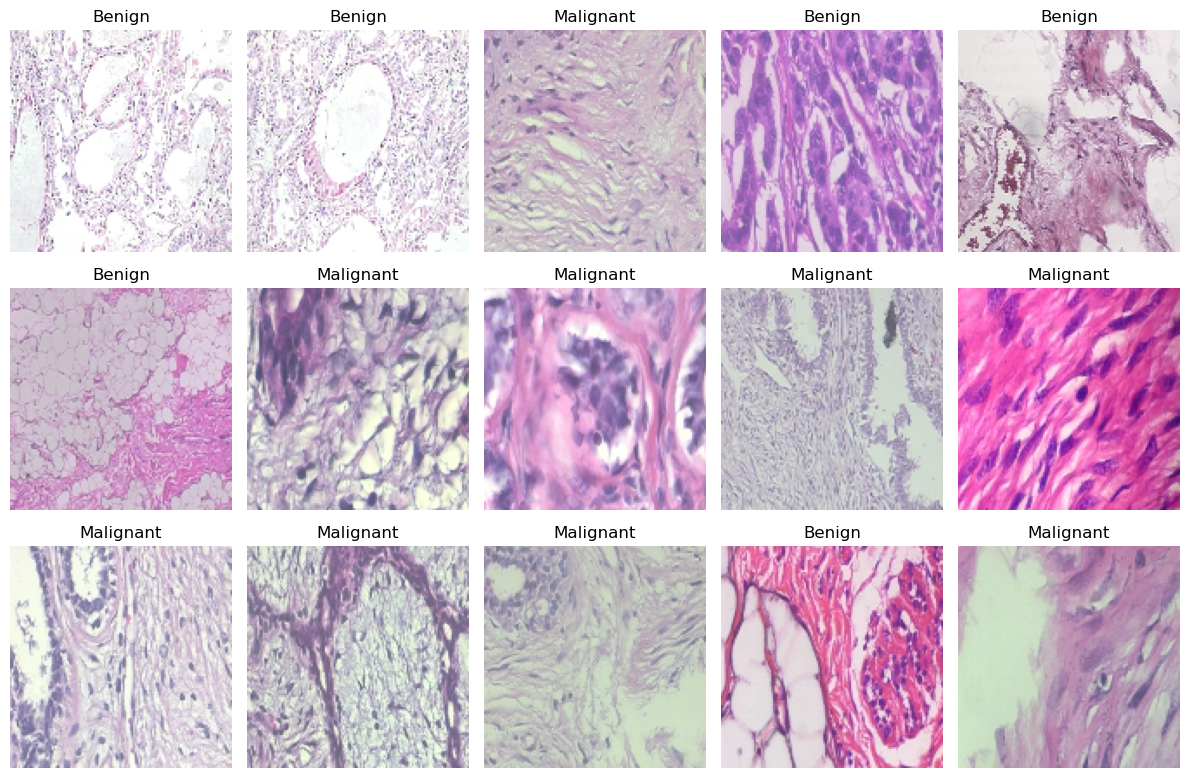

In [6]:
import random
import matplotlib.pyplot as plt
import cv2

def display_sample_images(images, labels, class_names):
    plt.figure(figsize=(12, 8))
    
    for i in range(15):
        idx = random.randint(0, len(images) - 1)
        img = images[idx]
        label = labels[idx]

        plt.subplot(3, 5, i + 1)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title(class_names[label])
        plt.axis('off')

    plt.tight_layout()
    plt.show()

class_names = ['Benign', 'Malignant']
display_sample_images(X, y, class_names)

In [7]:
X = X / 255.0

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [8]:
def create_model(model_name):
    if model_name == 'DenseNet':
        base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3))
    elif model_name == 'VGG16':
        base_model = VGG16(weights='imagenet', include_top=False, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3))
    elif model_name == 'InceptionV3':
        base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3))
    elif model_name == 'MobileNetV2':
        base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3))
    else:
        raise ValueError("Model not recognized")

    for layers in base_model.layers:
        layers.trainable = False

    model = Sequential()
    model.add(base_model)
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(2, activation='softmax'))

    model.compile(optimizer=Adam(0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [9]:
histories = []
model_weights = {}

# Train and evaluate each model
model_names = ['DenseNet', 'VGG16',  'InceptionV3', 'MobileNetV2']
for model_name in model_names:
    print(f'Training {model_name} model...')
    model = create_model(model_name)
    
    history = model.fit(X_train,y_train, epochs=5, batch_size=32, validation_data=(X_test,y_test))

    model_save_path = f"{model_name}_model.h5"
    model.save(model_save_path)

    histories.append(history)
    model_weights[model_name] = model


Training DenseNet model...
Epoch 1/5
107/107 ━━━━━━━━━━━━━━━━━━━━ 102s 856ms/step - accuracy: 0.6004 - loss: 0.8017 - val_accuracy: 0.7794 - val_loss: 0.4922
Epoch 2/5
107/107 ━━━━━━━━━━━━━━━━━━━━ 87s 814ms/step - accuracy: 0.7689 - loss: 0.4882 - val_accuracy: 0.8062 - val_loss: 0.4216
Epoch 3/5
107/107 ━━━━━━━━━━━━━━━━━━━━ 88s 822ms/step - accuracy: 0.8380 - loss: 0.3865 - val_accuracy: 0.8041 - val_loss: 0.4214
Epoch 4/5
107/107 ━━━━━━━━━━━━━━━━━━━━ 87s 813ms/step - accuracy: 0.8544 - loss: 0.3401 - val_accuracy: 0.8392 - val_loss: 0.3770
Epoch 5/5
107/107 ━━━━━━━━━━━━━━━━━━━━ 86s 809ms/step - accuracy: 0.8766 - loss: 0.2808 - val_accuracy: 0.8474 - val_loss: 0.3460


Training VGG16 model...
Epoch 1/5
107/107 ━━━━━━━━━━━━━━━━━━━━ 191s 2s/step - accuracy: 0.5823 - loss: 0.7018 - val_accuracy: 0.7072 - val_loss: 0.5765
Epoch 2/5
107/107 ━━━━━━━━━━━━━━━━━━━━ 189s 2s/step - accuracy: 0.6882 - loss: 0.5873 - val_accuracy: 0.6997 - val_loss: 0.5573
Epoch 3/5
107/107 ━━━━━━━━━━━━━━━━━━━━ 188s 2s/step - accuracy: 0.7156 - loss: 0.5593 - val_accuracy: 0.7471 - val_loss: 0.5194
Epoch 4/5
107/107 ━━━━━━━━━━━━━━━━━━━━ 189s 2s/step - accuracy: 0.7455 - loss: 0.5121 - val_accuracy: 0.7656 - val_loss: 0.5062
Epoch 5/5
107/107 ━━━━━━━━━━━━━━━━━━━━ 189s 2s/step - accuracy: 0.7666 - loss: 0.4910 - val_accuracy: 0.7794 - val_loss: 0.4893


Training InceptionV3 model...
Epoch 1/5
107/107 ━━━━━━━━━━━━━━━━━━━━ 53s 432ms/step - accuracy: 0.5596 - loss: 1.0970 - val_accuracy: 0.6832 - val_loss: 0.6093
Epoch 2/5
107/107 ━━━━━━━━━━━━━━━━━━━━ 42s 391ms/step - accuracy: 0.6898 - loss: 0.5901 - val_accuracy: 0.6770 - val_loss: 0.6006
Epoch 3/5
107/107 ━━━━━━━━━━━━━━━━━━━━ 42s 392ms/step - accuracy: 0.6992 - loss: 0.5707 - val_accuracy: 0.7100 - val_loss: 0.5689
Epoch 4/5
107/107 ━━━━━━━━━━━━━━━━━━━━ 42s 394ms/step - accuracy: 0.7486 - loss: 0.5224 - val_accuracy: 0.7141 - val_loss: 0.5627
Epoch 5/5
107/107 ━━━━━━━━━━━━━━━━━━━━ 43s 407ms/step - accuracy: 0.7554 - loss: 0.4967 - val_accuracy: 0.7134 - val_loss: 0.5494


Training MobileNetV2 model...
Epoch 1/5
107/107 ━━━━━━━━━━━━━━━━━━━━ 41s 339ms/step - accuracy: 0.5954 - loss: 0.9265 - val_accuracy: 0.7299 - val_loss: 0.5610
Epoch 2/5
107/107 ━━━━━━━━━━━━━━━━━━━━ 31s 290ms/step - accuracy: 0.7358 - loss: 0.5233 - val_accuracy: 0.7498 - val_loss: 0.5229
Epoch 3/5
107/107 ━━━━━━━━━━━━━━━━━━━━ 31s 289ms/step - accuracy: 0.7988 - loss: 0.4229 - val_accuracy: 0.7347 - val_loss: 0.5175
Epoch 4/5
107/107 ━━━━━━━━━━━━━━━━━━━━ 31s 289ms/step - accuracy: 0.8231 - loss: 0.3771 - val_accuracy: 0.7588 - val_loss: 0.4947
Epoch 5/5
107/107 ━━━━━━━━━━━━━━━━━━━━ 31s 287ms/step - accuracy: 0.8607 - loss: 0.3115 - val_accuracy: 0.7711 - val_loss: 0.4810


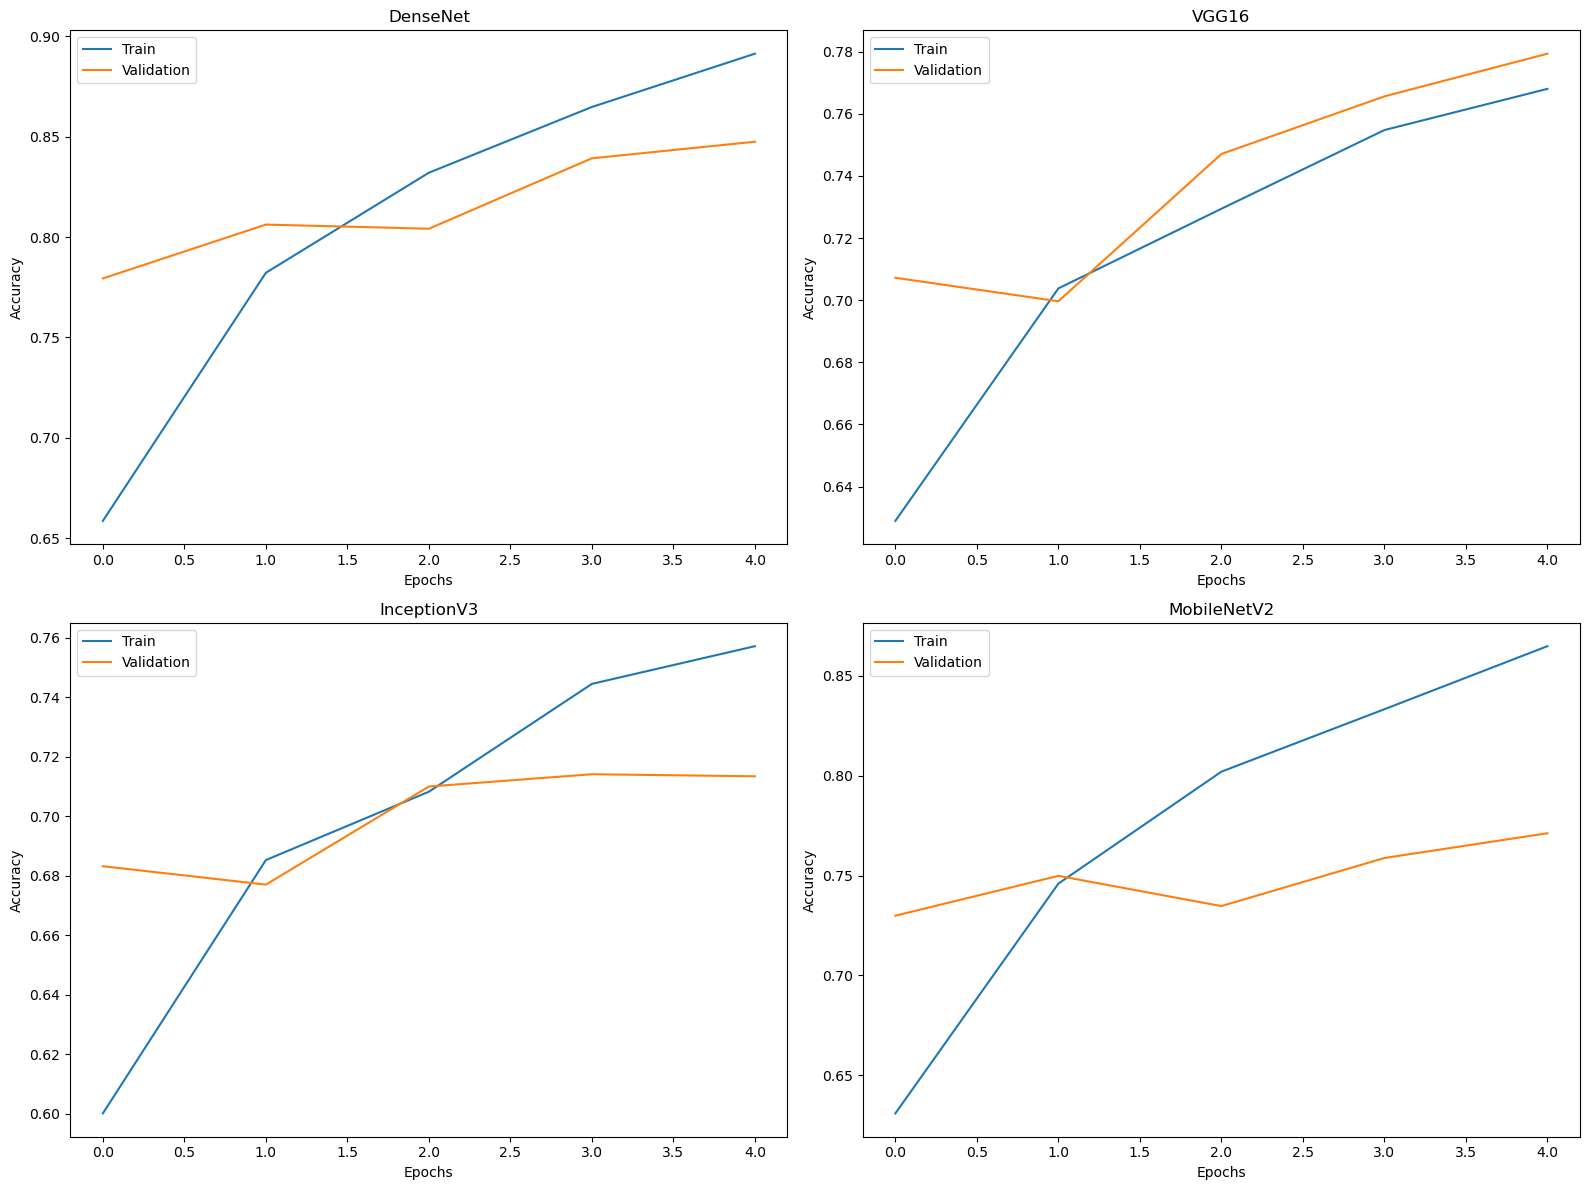

In [10]:
fig, axs = plt.subplots(2, 2, figsize=(16, 12))

# Flatten the 2D array of axes to make looping easier
axs = axs.ravel()

# Loop over the models and plot the accuracy and validation accuracy
for i, history in enumerate(histories):
    axs[i].plot(history.history['accuracy'])
    axs[i].plot(history.history['val_accuracy'])
    axs[i].legend(['Train', 'Validation'])
    axs[i].set_xlabel('Epochs')
    axs[i].set_title(model_names[i])
    axs[i].set_ylabel('Accuracy')

plt.tight_layout()
plt.show()

In [11]:
for model_name in model_names:
  model = model_weights[model_name]
  model_loss, model_accuracy = model.evaluate(X_test,y_test)
  print(model_name,"\n")
  print(f"Model Loss : {model_loss}\nModel Accuracy : {model_accuracy}\n")

46/46 ━━━━━━━━━━━━━━━━━━━━ 26s 551ms/step - accuracy: 0.8452 - loss: 0.3436
DenseNet 

Model Loss : 0.3460375964641571
Model Accuracy : 0.8474226593971252

46/46 ━━━━━━━━━━━━━━━━━━━━ 56s 1s/step - accuracy: 0.7662 - loss: 0.5060
VGG16 

Model Loss : 0.48931294679641724
Model Accuracy : 0.7793814539909363

46/46 ━━━━━━━━━━━━━━━━━━━━ 12s 268ms/step - accuracy: 0.7018 - loss: 0.5503
InceptionV3 

Model Loss : 0.5493768453598022
Model Accuracy : 0.7134020328521729

46/46 ━━━━━━━━━━━━━━━━━━━━ 8s 180ms/step - accuracy: 0.7813 - loss: 0.4924
MobileNetV2 

Model Loss : 0.4810478389263153
Model Accuracy : 0.7711340188980103



46/46 ━━━━━━━━━━━━━━━━━━━━ 30s 604ms/step
46/46 ━━━━━━━━━━━━━━━━━━━━ 57s 1s/step
46/46 ━━━━━━━━━━━━━━━━━━━━ 16s 298ms/step
46/46 ━━━━━━━━━━━━━━━━━━━━ 10s 205ms/step


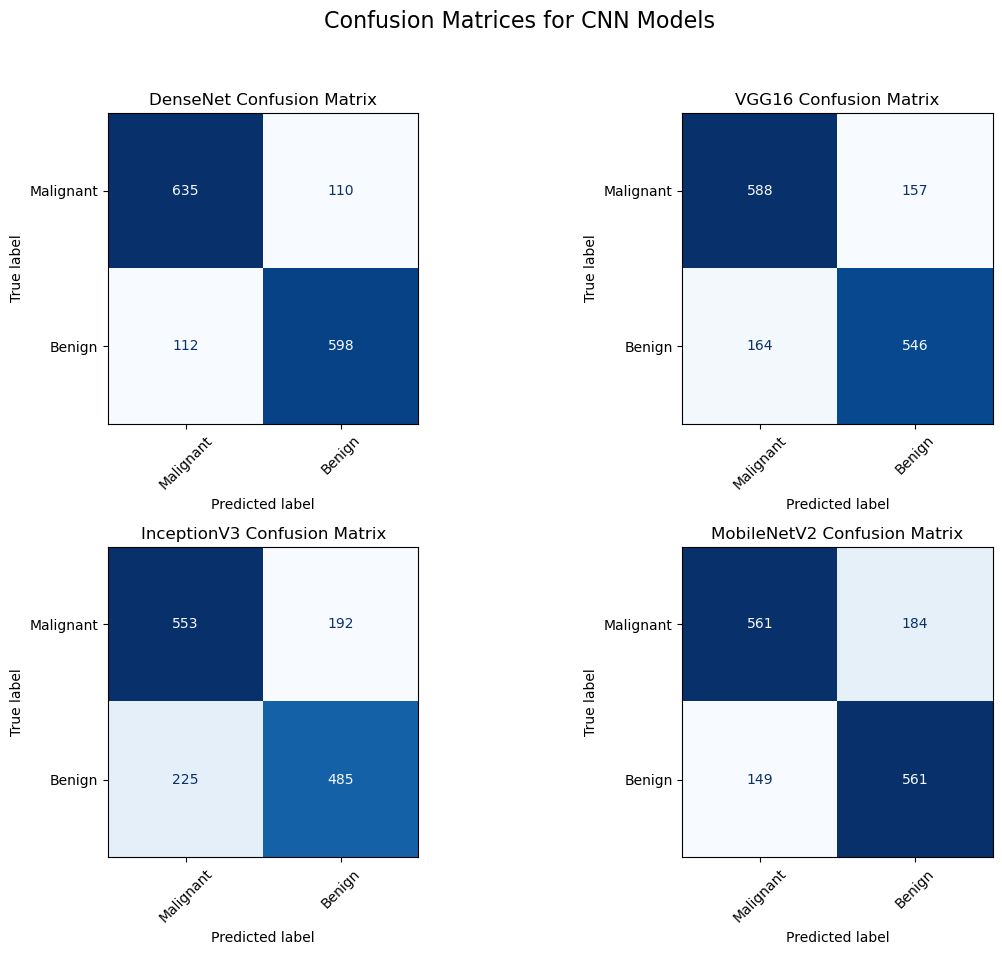

In [12]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

def plot_confusion_matrices(model_dict, model_names, X_test, y_test, class_names):

    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    fig.suptitle('Confusion Matrices for CNN Models', fontsize=16)

    for ax, model_name in zip(axes.flatten(), model_names):
        # Get the model from the dictionary
        model = model_weights[model_name]

        # Get predictions for the test set
        y_pred = model.predict(X_test)
        y_pred_classes = np.argmax(y_pred, axis=1) 

        # If y_test is one-hot encoded, convert it back to class indices
        if y_test.ndim > 1:
            y_test_classes = np.argmax(y_test, axis=1)
        else:
            y_test_classes = y_test

        # Calculate the confusion matrix
        cm = confusion_matrix(y_test_classes, y_pred_classes)

        # Plot the confusion matrix
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
        disp.plot(ax=ax, cmap='Blues', xticks_rotation=45, colorbar=False)
        ax.set_title(f"{model_name} Confusion Matrix")
    
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  
    plt.show()


class_names = ['Malignant', 'Benign']
model_names = ['DenseNet', 'VGG16', 'InceptionV3', 'MobileNetV2']
plot_confusion_matrices(model_weights, model_names, X_test, y_test, class_names)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


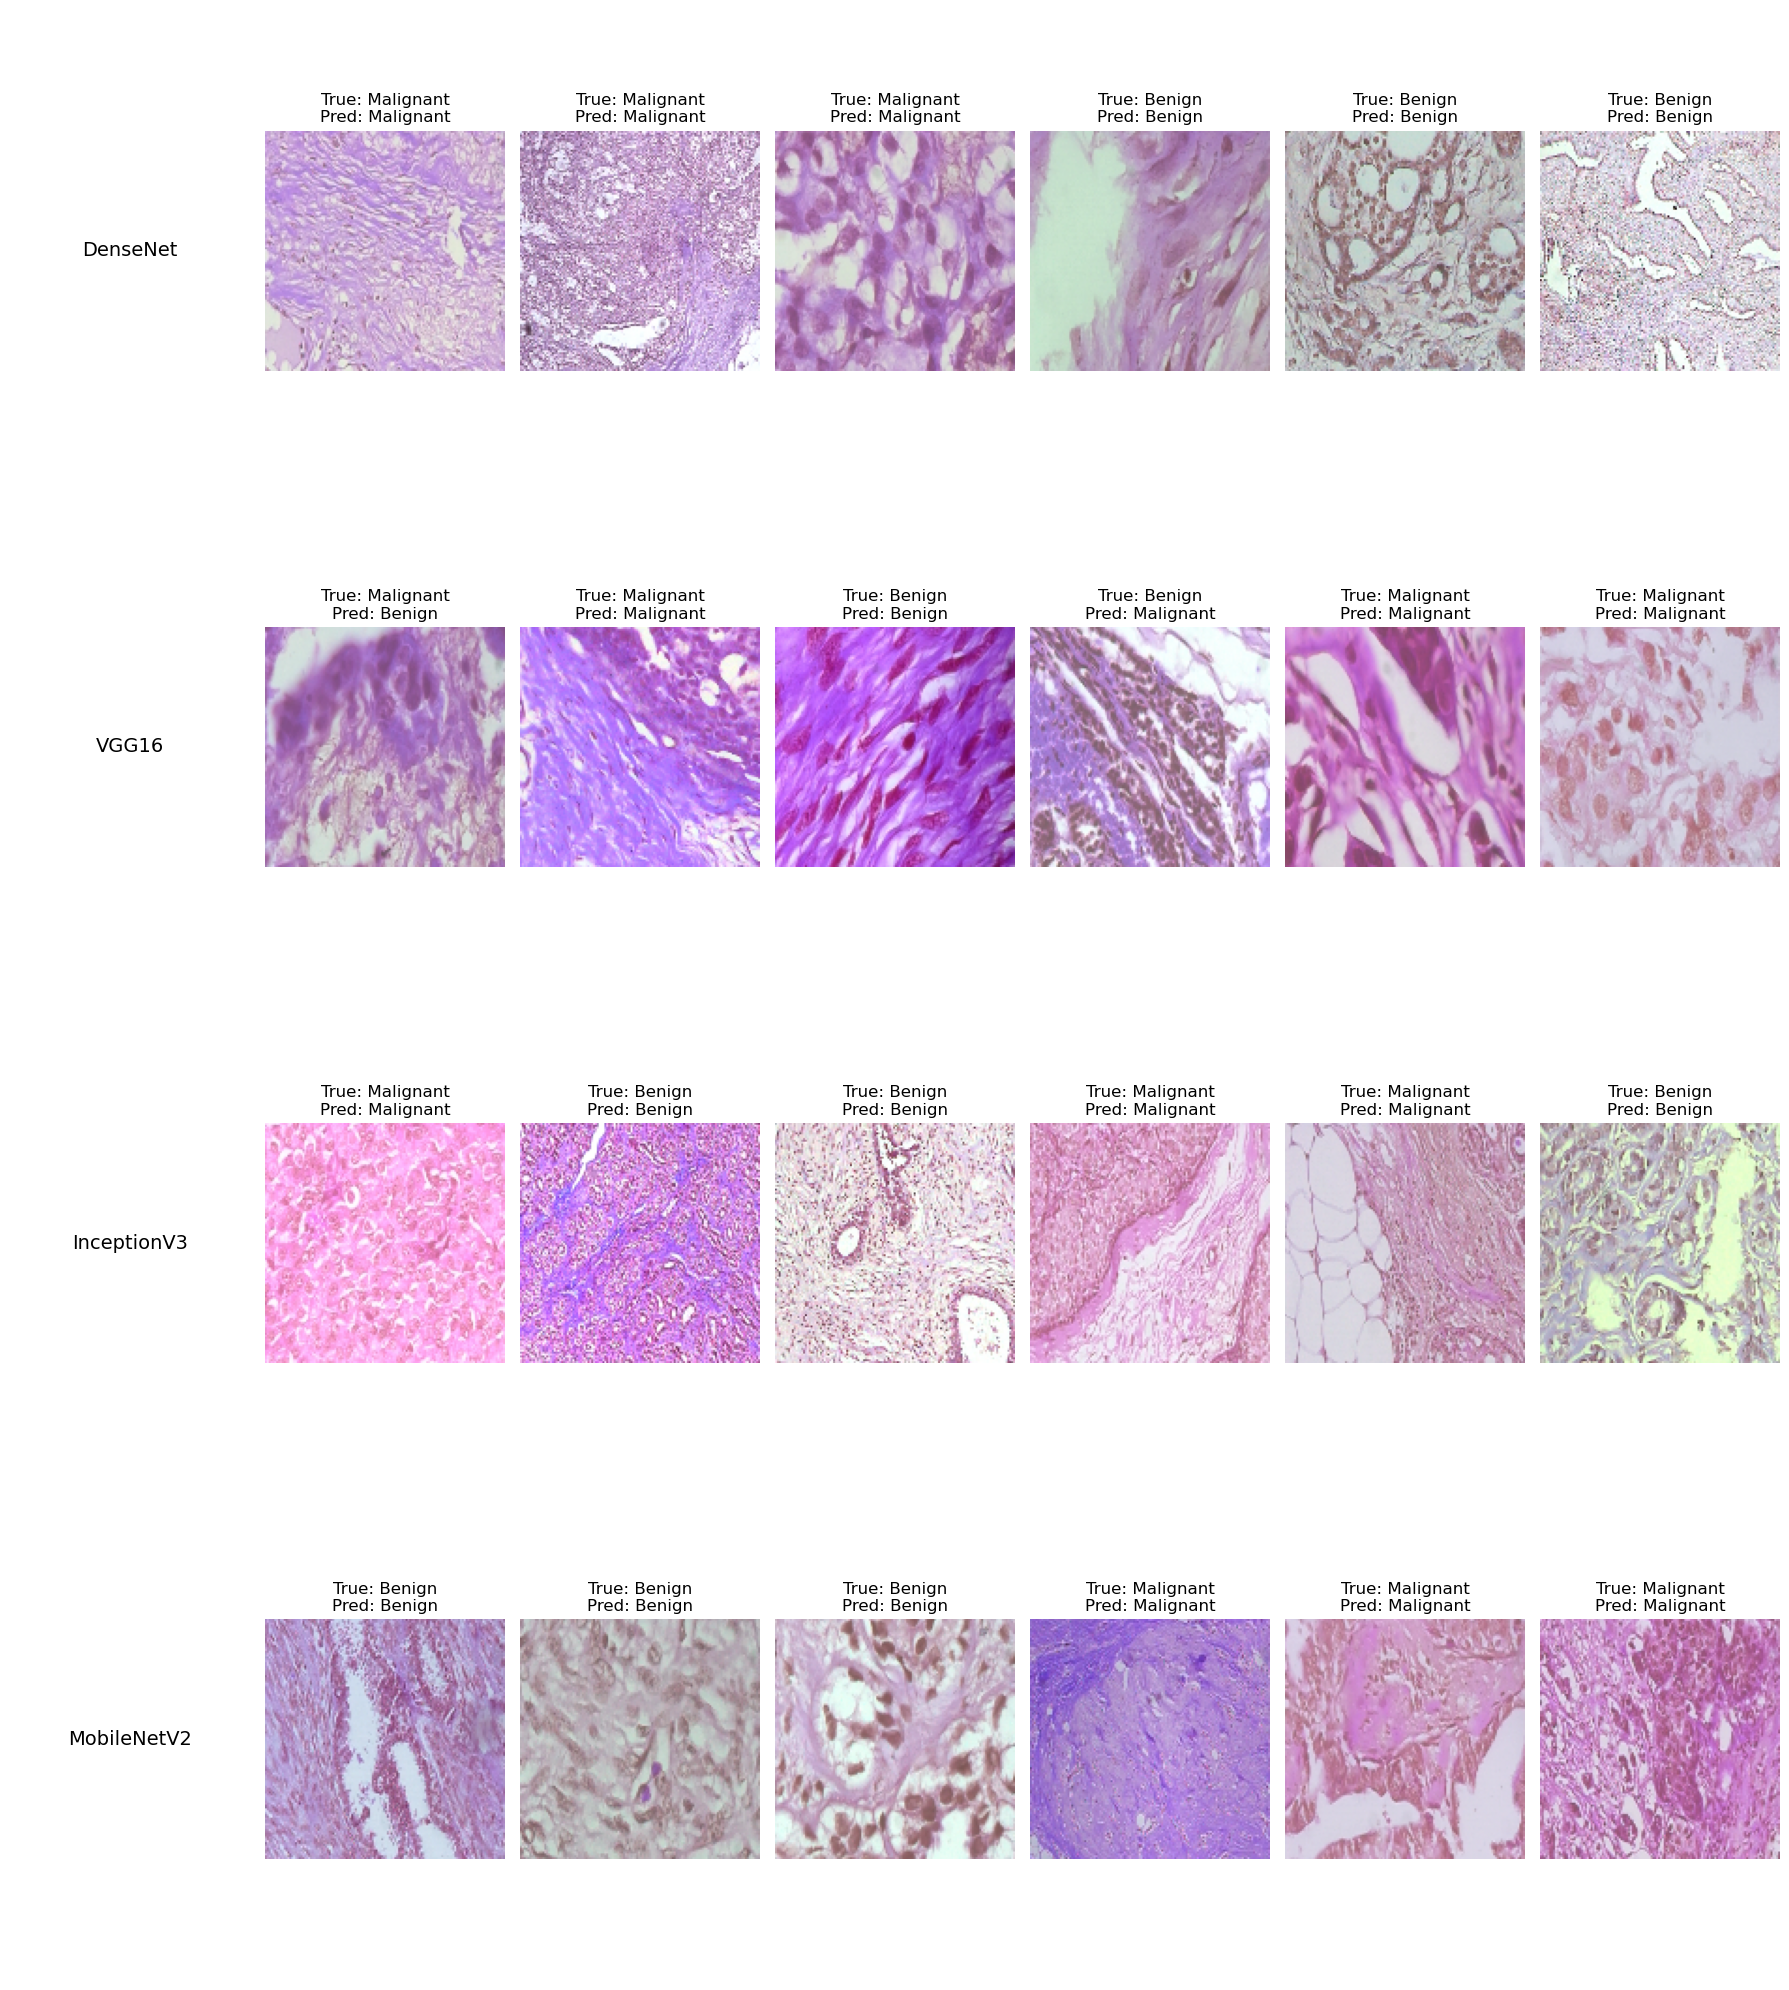

In [13]:
def predict_from_test_data(model, X_test, y_test, class_names, index):
    img = X_test[index]
    ground_truth_label = y_test[index]

    img_array = np.expand_dims(img, axis=0)

    predictions = model.predict(img_array)
    predicted_class_index = np.argmax(predictions[0])
    predicted_class = class_names[predicted_class_index]

    ground_truth_class = class_names[ground_truth_label]

    return img, ground_truth_class, predicted_class, predictions[0]

def display_predictions_grid(model_weights, X_test, y_test, class_names, model_names, num_samples=6):
    plt.figure(figsize=(18, len(model_names) * 5))  
    num_models = len(model_names)

    for j, model_name in enumerate(model_names):
        model = model_weights[model_name]

        plt.subplot(num_models, num_samples + 1, j * (num_samples + 1) + 1)
        plt.text(0.5, 0.5, model_name, fontsize=14, ha='center', va='center')
        plt.axis('off')

        for i in range(num_samples):
            index = np.random.randint(0, len(X_test))
            img, ground_truth, predicted_class, probabilities = predict_from_test_data(model, X_test, y_test, class_names, index)

            # Display the image
            plt.subplot(num_models, num_samples + 1, j * (num_samples + 1) + i + 2)
            plt.imshow(img)
            plt.title(f'True: {ground_truth}\nPred: {predicted_class}')
            plt.axis('off')

    plt.tight_layout()
    plt.show()

display_predictions_grid(model_weights, X_test, y_test, class_names, model_names)